In [1]:
from train.retrieve import get_results, get_paths, load_picks
import pickle

In [2]:
res = get_results("results", clean=True)

In [3]:
res = res.drop(["train_accuracy", "train_precision", "train_recall", "train_f1score", "train_loss"], axis = 1)
res

,Model Name,Model ID,Data ID,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Model Size,Best Val Accuracy,Best Val Loss
0,wavenet_dil,model_0,"Corpusedf_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.8587,0.8537,0.8333,0.8434,0.3788,NaN,NaN,NaN
1,alternate,model_1,"Corpusedf_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.7717,0.7692,0.7143,0.7407,0.4912,60220.0,NaN,NaN
2,WaveNetFull,model_2,"Corpusedf_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.8514,0.8346,0.8413,0.8379,0.3459,218222.0,NaN,NaN
3,wavenet_dil,model_3,"Corpusedf_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.8514,0.8829,0.7778,0.8270,0.3701,158004.0,NaN,NaN
4,wavenet_dil,model_5,"Corpusedf_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.8514,0.8571,0.8095,0.8327,0.3587,158004.0,NaN,NaN
5,WaveNetFull,model_6,"Corpusedf_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.8478,0.8443,0.8175,0.8306,0.3667,218222.0,NaN,NaN
6,WaveNetFull,model_7,results1,0.5246,1.0000,0.0333,0.0645,0.8587,218222.0,NaN,NaN
7,WaveNetFull,model_8,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.6448,0.6238,0.7000,0.6597,1.0979,218222.0,NaN,NaN
8,WaveNetFull,model_10,results2,0.6667,0.6829,0.6222,0.6512,1.0423,218222.0,NaN,NaN
9,WaveNetFull,model_11,results3,0.6782,0.6476,0.7816,0.7083,0.9415,218222.0,NaN,NaN


In [8]:
res.sort_values("Best Val Accuracy", ascending = False).iloc[:20]

,Model Name,Model ID,Data ID,train_accuracy,train_precision,train_recall,train_f1score,train_loss,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Model Size,Best Val Accuracy,Best Val Loss
109,FusWB_cu16_wu64_d3_cTrue_pTrue,model_117,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8012,0.4364,0.8559,0.5781,0.4178,0.8118,0.7789,0.8706,0.8222,0.7655,97462.0,0.8588,0.7458
140,FusWB_cu32_wu16_d2_cFalse_pFalse,model_148,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7678,0.3924,0.8378,0.5345,0.4720,0.7412,0.6752,0.9294,0.7822,0.6506,22948.0,0.8588,0.6506
208,FusWB_cu64_wu16_d3_cFalse_pFalse,model_216,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7912,0.4210,0.8318,0.5590,0.4348,0.7588,0.6897,0.9412,0.7960,0.5157,29588.0,0.8588,0.4821
127,FusWB_cu16_wu128_d3_cFalse_pTrue,model_135,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8060,0.4429,0.8498,0.5823,0.4386,0.8176,0.7596,0.9294,0.8360,0.5465,280150.0,0.8588,0.5465
290,FusWB_cu128_wu32_d4_cTrue_pFalse,model_298,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8165,0.4589,0.8559,0.5975,0.3841,0.7529,0.6777,0.9647,0.7961,0.4978,78036.0,0.8529,0.4886
101,FusWB_cu16_wu32_d6_cTrue_pTrue,model_109,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7797,0.4072,0.8438,0.5494,0.4389,0.8529,0.9167,0.7765,0.8408,0.9489,66070.0,0.8529,0.9227
274,FusWB_cu128_wu16_d4_cTrue_pFalse,model_282,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8089,0.4489,0.8829,0.5951,0.4083,0.7353,0.6695,0.9294,0.7783,0.6516,60356.0,0.8529,0.6426
179,FusWB_cu32_wu64_d4_cFalse_pTrue,model_187,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8032,0.4388,0.8498,0.5787,0.4077,0.8235,0.8161,0.8353,0.8256,0.7004,119206.0,0.8529,0.7004
65,Fusion+WaveBlock,model_73,"EEG Corpus_T[1368, 1346]_E[150, 126]_PMULTI_Pi...",0.8628,0.8812,0.8373,0.8587,0.3181,0.8116,0.8190,0.7540,0.7851,0.3705,50982.0,0.8478,0.3546
238,FusWB_cu64_wu64_d3_cTrue_pFalse,model_246,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8022,0.4368,0.8408,0.5749,0.4382,0.7647,0.7064,0.9059,0.7938,0.6288,100340.0,0.8471,0.5842


In [40]:
res.iloc[110:]

,Model Name,Model ID,Data ID,train_accuracy,train_precision,train_recall,train_f1score,train_loss,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Model Size,Best Val Accuracy,Best Val Loss
110,FusWB_cu16_wu64_d3_cTrue_pFalse,model_118,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7936,0.4240,0.8288,0.5610,0.4378,0.8059,0.7955,0.8235,0.8092,0.7474,83012.0,0.8294,0.7474
111,FusWB_cu16_wu64_d3_cFalse_pTrue,model_119,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8017,0.4319,0.7808,0.5561,0.4560,0.8176,0.8649,0.7529,0.8050,0.9856,93910.0,0.8235,0.9856
112,FusWB_cu16_wu64_d3_cFalse_pFalse,model_120,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7654,0.3884,0.8258,0.5283,0.4555,0.7118,0.7000,0.7412,0.7200,1.0787,80660.0,0.7882,0.9342
113,FusWB_cu16_wu64_d4_cTrue_pTrue,model_121,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7802,0.4016,0.7778,0.5297,0.4801,0.6765,0.8261,0.4471,0.5802,1.4497,118134.0,0.7235,1.3801
114,FusWB_cu16_wu64_d4_cTrue_pFalse,model_122,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7573,0.3652,0.7117,0.4827,0.5436,0.6118,0.7714,0.3176,0.4500,1.6151,103684.0,0.6294,1.5729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,FusWB_cu128_wu128_d2_cTrue_pTrue,model_321,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7931,0.4235,0.8318,0.5613,0.4506,0.8235,0.8022,0.8588,0.8295,0.6979,265798.0,0.8235,0.6979
314,FusWB_cu128_wu128_d2_cTrue_pFalse,model_322,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.8299,0.4806,0.8559,0.6156,0.3818,0.6529,0.5956,0.9529,0.7330,0.5634,234548.0,0.8412,0.5634
315,FusWB_cu128_wu128_d2_cFalse_pTrue,model_323,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7984,0.4310,0.8348,0.5685,0.4458,0.8176,0.8750,0.7412,0.8025,1.1435,237382.0,0.8235,1.0915
316,FusWB_cu128_wu128_d2_cFalse_pFalse,model_324,"eg_dataset_T[2967, 355]_E[95, 90]_PMULTI_Pipel...",0.7797,0.4021,0.7898,0.5329,0.4660,0.7118,0.6452,0.9412,0.7656,0.6125,215732.0,0.7706,0.5136


In [14]:
res = get_results("results", clean=False)
mod_info = res[res["Model ID"] == "model_19"]
mod_info

,Model Name,Model ID,Data ID,hyperparamters des,model des,data des,history des,train_accuracy,train_precision,train_recall,train_f1score,train_loss,val_accuracy,val_precision,val_recall,val_f1score,val_loss,Model Size,Best Val Accuracy,Best Val Loss
16,WaveNetDP,model_19,results2,results/hparam/model_19.pkl,results/model_info/model_19.pkl,results/data_info/model_19.pkl,results/history/model_19.pkl,0.863586,0.890488,0.827637,0.857913,0.328564,0.833333,0.877358,0.738095,0.801724,0.383974,157874.0,NaN,NaN


In [17]:
h, m, d, hi = load_picks(res, "model_19")

In [20]:
print(m["summary"])

WaveNetDP(
  (block1): WaveBlock(
    (layers): ModuleList(
      (0): WaveLayer(
        (conv): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(2,))
        (tanh): Tanh()
        (sig): Sigmoid()
        (filter): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (gate): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
      )
      (1): WaveLayer(
        (conv): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(2,))
        (tanh): Tanh()
        (sig): Sigmoid()
        (filter): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (gate): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
      )
      (2): WaveLayer(
        (conv): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(4,))
        (tanh): Tanh()
        (sig): Sigmoid()
        (filter): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (gate): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
      )
      (3): WaveLayer(
        (conv): Conv1d(16, 16, kernel_size=(3,),

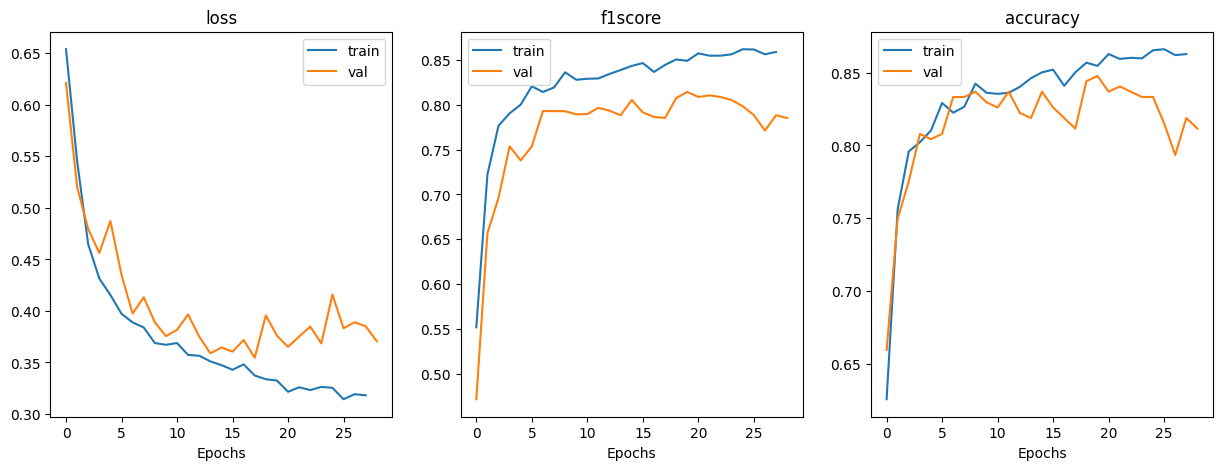

In [22]:
hi.plot()

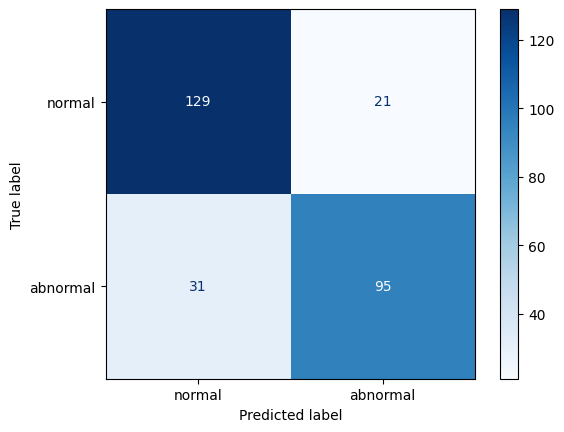

In [23]:
hi.display_cm()

In [24]:
print(m['summary'])

FusionSCWave(
  (silm): SILM()
  (fusion1): FusionMod(
    (convL1): Conv1d(50, 8, kernel_size=(5,), stride=(1,), padding=(2,))
    (bnL1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (convL2): Conv1d(58, 16, kernel_size=(5,), stride=(1,), padding=(2,))
    (bnL2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (convR1): Conv1d(50, 8, kernel_size=(5,), stride=(1,), padding=(2,))
    (bnR1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (convR2): Conv1d(58, 16, kernel_size=(5,), stride=(1,), padding=(2,))
    (bnR2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fusion2): FusionMod(
    (convL1): Conv1d(50, 8, kernel_size=(5,), stride=(1,), padding=(2,))
    (bnL1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (convL2): Conv1d(58, 16, kernel_size=(5,), stride=(1,), padding=(2,))
    (bnL2): BatchNo